# [Introduction to PyTorch - YouTube Series](https://pytorch.org/tutorials/beginner/introyt.html)

[PyTorch Beginner Series - YouTube](https://www.youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN)

[B站搬运](https://www.bilibili.com/video/BV1qh411U73y/)

## 01 Introduction to PyTorch

### Tensors

Python API

compiled cpp code

In [2]:
import torch

z = torch.zeros(5,3)
print(z)
print(z.dtype)

i = torch.ones((5,3), dtype=torch.int16)
print(i)



tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [3]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print(r1)
r2 = torch.rand(2,2)
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2,2)
print(r3)

print(r1==r3)  # repeat values of r1 because of re-seed



tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[True, True],
        [True, True]])


In [4]:
ones = torch.ones(2,3)
twos = torch.ones(2,3)*2

threes = ones+twos
print(threes)


tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [10]:
r = torch.rand(2,2) - 0.5*2 # -1,1
print(r)
print(r.abs())
print(torch.abs(r))
print(r.abs_())
print(r)


tensor([[-0.8021, -0.6673],
        [-0.3854, -0.4001]])
tensor([[0.8021, 0.6673],
        [0.3854, 0.4001]])
tensor([[0.8021, 0.6673],
        [0.3854, 0.4001]])
tensor([[0.8021, 0.6673],
        [0.3854, 0.4001]])
tensor([[0.8021, 0.6673],
        [0.3854, 0.4001]])


In [12]:
r = torch.rand(2,2) - 0.5 * 2  # -1,1
print("asin")
print(torch.asin(r))
print("det")
print(torch.det(r))
print("svd")
print(torch.svd(r))
print("std_mean")
print(torch.std_mean(r))
print("max")
print(torch.max(r))


asin
tensor([[-0.3189, -0.6927],
        [-0.3583, -0.8282]])
det
tensor(0.0070)
svd
torch.return_types.svd(
U=tensor([[-0.6572, -0.7537],
        [-0.7537,  0.6572]]),
S=tensor([1.0825, 0.0065]),
V=tensor([[ 0.4345,  0.9007],
        [ 0.9007, -0.4345]]))
std_mean
(tensor(0.2097), tensor(-0.5099))
max
tensor(-0.3135)


In [14]:
from numpy import linalg

U,S,Vh = linalg.svd(r)

print(U)
print(S)
print(Vh)



[[-0.65719515 -0.75372046]
 [-0.75372046  0.65719515]]
[1.0824655  0.00649558]
[[ 0.43451345  0.90066534]
 [ 0.90066534 -0.43451345]]


### Autograd

![](Pics/torch003.png)

In [ ]:
x = torch.randn(1,10)
prev_h = torch.randn(1,20)
W_h = torch.randn(20,20)
W_x = torch.randn(20,10)

i2h = W_x @ x.T
h2h = W_h @ prev_h.T
next_h = i2h + h2h
next_h = next_h.tanh()

loss = next_h.sum()
loss.backward()  # 求 grad


### Building Models in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    # LeNet5 is meant to take in a 1x32x32 black & white image
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    """
    输入: 1x32x32
    经过 conv1: 6x28x28
    经过第一层池化: 6x14x14
    经过 conv2: 16x12x12
    经过第二层池化: 16x6x6
    展平后: 576
    经过 fc1: 120
    经过 fc2: 84
    经过 fc3 (输出层): 10
    """

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [5]:
net = LeNet()
print(net)
input = torch.rand((1,1,32,32))

with torch.no_grad():
    output = net(input)
    print(output)

output = net(input)
print(output)


LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
tensor([[-0.1177, -0.1067,  0.0669, -0.0946,  0.1333, -0.0769,  0.0089,  0.0515,
          0.0763,  0.0280]])
tensor([[-0.1177, -0.1067,  0.0669, -0.0946,  0.1333, -0.0769,  0.0089,  0.0515,
          0.0763,  0.0280]], grad_fn=<AddmmBackward0>)


### Datasets and Dataloaders



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # centering data for better learning
])

trainset = torchvision.datasets.CIFAR10(root="/home/lzy/Datasets", 
                                        train=True, 
                                        download=True,
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)


Files already downloaded and verified


True
False


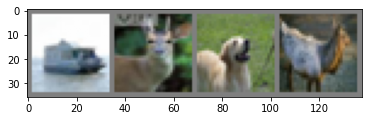

'ship' 'deer' 'dog' 'deer'


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections.abc import Iterable, Iterator

classes = ("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")

print(isinstance(trainloader, Iterable))  # True
print(isinstance(trainloader, Iterator))  # False

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(" ".join("%5a"%classes[labels[j]] for j in range(4)))


### Traing Your PyTorch Model

In [8]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
transform = transforms.Compose(
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
)

trainset = torchvision.datasets.CIFAR10(root="/home/lzy/Datasets", 
                                        train=True, 
                                        download=True,
                                        transform=transform)

trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root="/home/lzy/Datasets",
                                       train=False,
                                       download=True,
                                       transform=transform)

testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=4)


classes = ("plane","car","bird","cat","deer","dog","frog","horse","ship","truck")


In [65]:
import torch
x = torch.tensor([1,2,3,4], requires_grad=True, dtype=torch.float32)
y = 2.0 * torch.dot(x, x)
# 对y进行反向传播，计算梯度
y.backward(retain_graph=True)
print("After first backward: ", x.grad)
# 再次对y进行反向传播，查看梯度如何累加
y.backward(retain_graph=True)
print("After second backward: ", x.grad)


After first backward:  tensor([ 4.,  8., 12., 16.])
After second backward:  tensor([ 8., 16., 24., 32.])


In [66]:
import torch
x = torch.tensor([1,2,3,4], requires_grad=True, dtype=torch.float32)
# 对y进行反向传播，计算梯度
y = 2.0 * torch.dot(x, x)
y.backward()
print("After first backward: ", x.grad)
# 再次对y进行反向传播，查看梯度如何累加
y = 2.0 * torch.dot(x, x)
y.backward()
print("After second backward: ", x.grad)


After first backward:  tensor([ 4.,  8., 12., 16.])
After second backward:  tensor([ 8., 16., 24., 32.])


In [63]:
y = 2.0*torch.dot(x,x)
y.backward()


In [64]:
x.grad


tensor([16., 32., 48., 64.])

## 02 Introduction to PyTorch Tensors



## 03 The Fundamentals of Autograd



## 04 Building Models with PyTorch



## 05 PyTorch TensorBoard Support



## 06 Training with PyTorch



## 07 Model Understanding with Captum


## 08 Production Inference Deployment with PyTorch